In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.types import (StructType, StructField, StringType, ArrayType, IntegerType, FloatType, TimestampType)
spark = SparkSession.builder.appName("YoutubeComments").getOrCreate()

In [4]:
from pyspark.sql.functions import explode, col, avg

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
schema = StructType([
    StructField("videos", ArrayType(StructType([
        StructField("videoId", StringType(), True),
        StructField("videoTitle", StringType(), True),
        StructField("videoPublishedAt", StringType(), True),
        StructField("videoLikes", StringType(), True),
        StructField("videoViews", StringType(), True),
        StructField("videoCommentCount", StringType(), True),
        StructField("comments", ArrayType(StructType([
            StructField("commentId", StringType(), True),
            StructField("authorId", StringType(), True),
            StructField("likeCount", StringType(), True),
            StructField("dislikeCount", StringType(), True),
            StructField("totalReplyCount", StringType(), True),
            StructField("commentText", StringType(), True),
            StructField("commentPublishedAt", StringType(), True),
            StructField("replies", ArrayType(StructType([
                StructField("commentId", StringType(), True),
                StructField("authorId", StringType(), True),
                StructField("likeCount", StringType(), True),
                StructField("dislikeCount", StringType(), True),
                StructField("commentText", StringType(), True),
                StructField("commentPublishedAt", StringType(), True)
            ])), True)
        ])), True)
    ])), True)
])

df = spark.read.option("multiline", "true").json(r"C:\Users\ual-laptop\Desktop\bd584 prj\10_videos_mkhd_comments.json")

channel_id = 'UCBJycsmduvYEL83R_U4JriQ'

In [7]:
df

DataFrame[videos: array<struct<comments:array<struct<authorId:string,commentId:string,commentPublishedAt:string,commentText:string,dislikeCount:string,likeCount:bigint,replies:array<struct<authorId:string,commentId:string,commentPublishedAt:string,commentText:string,dislikeCount:string,likeCount:bigint>>,totalReplyCount:bigint>>,videoCommentCount:string,videoId:string,videoLikes:string,videoPublishedAt:string,videoTitle:string,videoViews:string>>]

In [8]:
df.printSchema()

root
 |-- videos: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- comments: array (nullable = true)
 |    |    |    |-- element: struct (containsNull = true)
 |    |    |    |    |-- authorId: string (nullable = true)
 |    |    |    |    |-- commentId: string (nullable = true)
 |    |    |    |    |-- commentPublishedAt: string (nullable = true)
 |    |    |    |    |-- commentText: string (nullable = true)
 |    |    |    |    |-- dislikeCount: string (nullable = true)
 |    |    |    |    |-- likeCount: long (nullable = true)
 |    |    |    |    |-- replies: array (nullable = true)
 |    |    |    |    |    |-- element: struct (containsNull = true)
 |    |    |    |    |    |    |-- authorId: string (nullable = true)
 |    |    |    |    |    |    |-- commentId: string (nullable = true)
 |    |    |    |    |    |    |-- commentPublishedAt: string (nullable = true)
 |    |    |    |    |    |    |-- commentText: string (nullable = true)
 |    

In [9]:
df.show()

+--------------------+
|              videos|
+--------------------+
|[{[{UC4wkdWmrO9fZ...|
+--------------------+



In [10]:
df_videos = df.selectExpr("explode(videos) as video")
df_comments = df_videos.selectExpr(
    "video.videoId", "video.videoTitle", "video.videoPublishedAt", 
    "video.videoLikes", "video.videoViews", "video.videoCommentCount",
    "explode(video.comments) as comment"
)

In [11]:
df_comments.show()

+-----------+--------------------+--------------------+----------+----------+-----------------+--------------------+
|    videoId|          videoTitle|    videoPublishedAt|videoLikes|videoViews|videoCommentCount|             comment|
+-----------+--------------------+--------------------+----------+----------+-----------------+--------------------+
|8om1eJrO2lU|RAZR+ Impressions...|2023-06-01T18:00:42Z|    112307|   4220512|             6327|{UC4wkdWmrO9fZwQv...|
|8om1eJrO2lU|RAZR+ Impressions...|2023-06-01T18:00:42Z|    112307|   4220512|             6327|{UCPmFc1pUNTfhkig...|
|8om1eJrO2lU|RAZR+ Impressions...|2023-06-01T18:00:42Z|    112307|   4220512|             6327|{UC-A_9OQ7tbv906t...|
|8om1eJrO2lU|RAZR+ Impressions...|2023-06-01T18:00:42Z|    112307|   4220512|             6327|{UCoUSgNf5e4D4gDm...|
|8om1eJrO2lU|RAZR+ Impressions...|2023-06-01T18:00:42Z|    112307|   4220512|             6327|{UC776mnqQrRhjKX4...|
|8om1eJrO2lU|RAZR+ Impressions...|2023-06-01T18:00:42Z|    11230

In [12]:
df_comments_expand = df_comments.select(
    "videoId",
    "videoTitle",
    "videoPublishedAt",
    "videoLikes",
    "videoViews",
    "videoCommentCount",
    "comment.commentId",
    "comment.authorId",
    "comment.likeCount",
    "comment.dislikeCount",
    "comment.commentText",
    "comment.commentPublishedAt"
)
df_comments_expand.show()


+-----------+--------------------+--------------------+----------+----------+-----------------+--------------------+--------------------+---------+------------+--------------------+--------------------+
|    videoId|          videoTitle|    videoPublishedAt|videoLikes|videoViews|videoCommentCount|           commentId|            authorId|likeCount|dislikeCount|         commentText|  commentPublishedAt|
+-----------+--------------------+--------------------+----------+----------+-----------------+--------------------+--------------------+---------+------------+--------------------+--------------------+
|8om1eJrO2lU|RAZR+ Impressions...|2023-06-01T18:00:42Z|    112307|   4220512|             6327|UgxR_ElTvBL4twU_R...|UC4wkdWmrO9fZwQvx...|        0|           0|This is the first...|2024-10-25T01:28:43Z|
|8om1eJrO2lU|RAZR+ Impressions...|2023-06-01T18:00:42Z|    112307|   4220512|             6327|UgyRrc3oLgZIN1I40...|UCPmFc1pUNTfhkigo...|        0|           0|I have bought a l...|2024-10

In [13]:
print((df_comments_expand.count(), len(df_comments_expand.columns)))

(10000, 12)


In [14]:
# removing any comments that are done by the channel itself channel_id
df_comments_expand = df_comments_expand.filter(df_comments_expand.authorId != channel_id)

In [15]:
print((df_comments_expand.count(), len(df_comments_expand.columns)))

(10000, 12)


In [16]:
# spark.stop()

In [17]:
# Convert to pandas dataframe
df_pandas_comments = df_comments_expand.toPandas()

df_pandas_comments

,videoId,videoTitle,videoPublishedAt,videoLikes,videoViews,videoCommentCount,commentId,authorId,likeCount,dislikeCount,commentText,commentPublishedAt
0,8om1eJrO2lU,RAZR+ Impressions: Is This What You Wanted?,2023-06-01T18:00:42Z,112307,4220512,6327,UgxR_ElTvBL4twU_REt4AaABAg,UC4wkdWmrO9fZwQvxSsa1Sag,0,0,This is the first phone that id actually be in...,2024-10-25T01:28:43Z
1,8om1eJrO2lU,RAZR+ Impressions: Is This What You Wanted?,2023-06-01T18:00:42Z,112307,4220512,6327,UgyRrc3oLgZIN1I40yZ4AaABAg,UCPmFc1pUNTfhkigoMWNYj-A,0,0,I have bought a last year model Razr 2023 whi...,2024-10-22T18:55:11Z
2,8om1eJrO2lU,RAZR+ Impressions: Is This What You Wanted?,2023-06-01T18:00:42Z,112307,4220512,6327,UgzWF5ptWIbq7tL3YV14AaABAg,UC-A_9OQ7tbv906tPp5l7pHA,0,0,"I personally like this front-screen idea, I am...",2024-10-22T16:54:17Z
3,8om1eJrO2lU,RAZR+ Impressions: Is This What You Wanted?,2023-06-01T18:00:42Z,112307,4220512,6327,UgxxvX_jzB35oWYYNI14AaABAg,UCoUSgNf5e4D4gDm9KCNd5YQ,0,0,Does anyone know how to move samsung notes (in...,2024-10-19T22:05:43Z
4,8om1eJrO2lU,RAZR+ Impressions: Is This What You Wanted?,2023-06-01T18:00:42Z,112307,4220512,6327,UgyQcqzRiCs5X7_8Ai54AaABAg,UC776mnqQrRhjKX4LcL5ymXQ,0,0,Yeah 999 no 😢,2024-10-16T17:13:20Z
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,HN-WH7C4K0Q,Here's the Thing about the M3 Macbook Air...,2024-03-20T21:20:58Z,116081,4950740,5919,UgxWE1vQbCnhp4r-rLl4AaABAg,UCLAzcfxDF3gVP8g90I70QIA,0,0,Hot take; you can just buy a zephyrus g14 for ...,2024-03-26T00:18:00Z
9996,HN-WH7C4K0Q,Here's the Thing about the M3 Macbook Air...,2024-03-20T21:20:58Z,116081,4950740,5919,UgzUk8_VKJdh9A2_XNN4AaABAg,UCUikEf2uhEBAuGRSf2Bv60g,0,0,FYI Bought my M1 MacBook Air when they first ...,2024-03-26T00:16:27Z
9997,HN-WH7C4K0Q,Here's the Thing about the M3 Macbook Air...,2024-03-20T21:20:58Z,116081,4950740,5919,UgzvoxXcoV0KXWpxOZN4AaABAg,UCJeyn2k-uwhHTMUySP1LaBQ,0,0,where is the option to watch the video in anot...,2024-03-26T00:14:01Z
9998,HN-WH7C4K0Q,Here's the Thing about the M3 Macbook Air...,2024-03-20T21:20:58Z,116081,4950740,5919,Ugz9aGoHnUcNzX-xSz94AaABAg,UCdYR8FJsKFwZw8-WSqAQl3g,0,0,OSHOMAJOSEPH WAS HERE,2024-03-26T00:09:30Z


In [19]:
df_pandas_comments.to_csv("comments.csv", index=False)

# Expanded DF

In [20]:
df_comments = pd.read_csv("comments.csv")

In [21]:
df_comments

,videoId,videoTitle,videoPublishedAt,videoLikes,videoViews,videoCommentCount,commentId,authorId,likeCount,dislikeCount,commentText,commentPublishedAt
0,8om1eJrO2lU,RAZR+ Impressions: Is This What You Wanted?,2023-06-01T18:00:42Z,112307,4220512,6327,UgxR_ElTvBL4twU_REt4AaABAg,UC4wkdWmrO9fZwQvxSsa1Sag,0,0,This is the first phone that id actually be in...,2024-10-25T01:28:43Z
1,8om1eJrO2lU,RAZR+ Impressions: Is This What You Wanted?,2023-06-01T18:00:42Z,112307,4220512,6327,UgyRrc3oLgZIN1I40yZ4AaABAg,UCPmFc1pUNTfhkigoMWNYj-A,0,0,I have bought a last year model Razr 2023 whi...,2024-10-22T18:55:11Z
2,8om1eJrO2lU,RAZR+ Impressions: Is This What You Wanted?,2023-06-01T18:00:42Z,112307,4220512,6327,UgzWF5ptWIbq7tL3YV14AaABAg,UC-A_9OQ7tbv906tPp5l7pHA,0,0,"I personally like this front-screen idea, I am...",2024-10-22T16:54:17Z
3,8om1eJrO2lU,RAZR+ Impressions: Is This What You Wanted?,2023-06-01T18:00:42Z,112307,4220512,6327,UgxxvX_jzB35oWYYNI14AaABAg,UCoUSgNf5e4D4gDm9KCNd5YQ,0,0,Does anyone know how to move samsung notes (in...,2024-10-19T22:05:43Z
4,8om1eJrO2lU,RAZR+ Impressions: Is This What You Wanted?,2023-06-01T18:00:42Z,112307,4220512,6327,UgyQcqzRiCs5X7_8Ai54AaABAg,UC776mnqQrRhjKX4LcL5ymXQ,0,0,Yeah 999 no 😢,2024-10-16T17:13:20Z
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,HN-WH7C4K0Q,Here's the Thing about the M3 Macbook Air...,2024-03-20T21:20:58Z,116081,4950740,5919,UgxWE1vQbCnhp4r-rLl4AaABAg,UCLAzcfxDF3gVP8g90I70QIA,0,0,Hot take; you can just buy a zephyrus g14 for ...,2024-03-26T00:18:00Z
9996,HN-WH7C4K0Q,Here's the Thing about the M3 Macbook Air...,2024-03-20T21:20:58Z,116081,4950740,5919,UgzUk8_VKJdh9A2_XNN4AaABAg,UCUikEf2uhEBAuGRSf2Bv60g,0,0,FYI Bought my M1 MacBook Air when they first ...,2024-03-26T00:16:27Z
9997,HN-WH7C4K0Q,Here's the Thing about the M3 Macbook Air...,2024-03-20T21:20:58Z,116081,4950740,5919,UgzvoxXcoV0KXWpxOZN4AaABAg,UCJeyn2k-uwhHTMUySP1LaBQ,0,0,where is the option to watch the video in anot...,2024-03-26T00:14:01Z
9998,HN-WH7C4K0Q,Here's the Thing about the M3 Macbook Air...,2024-03-20T21:20:58Z,116081,4950740,5919,Ugz9aGoHnUcNzX-xSz94AaABAg,UCdYR8FJsKFwZw8-WSqAQl3g,0,0,OSHOMAJOSEPH WAS HERE,2024-03-26T00:09:30Z


In [22]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   videoId             10000 non-null  object
 1   videoTitle          10000 non-null  object
 2   videoPublishedAt    10000 non-null  object
 3   videoLikes          10000 non-null  int64 
 4   videoViews          10000 non-null  int64 
 5   videoCommentCount   10000 non-null  int64 
 6   commentId           10000 non-null  object
 7   authorId            10000 non-null  object
 8   likeCount           10000 non-null  int64 
 9   dislikeCount        10000 non-null  int64 
 10  commentText         10000 non-null  object
 11  commentPublishedAt  10000 non-null  object
dtypes: int64(5), object(7)
memory usage: 937.6+ KB


In [23]:
# changing data type for videoPublishedAt and commentPublishedAt
df_comments['videoPublishedAt'] = pd.to_datetime(df_comments['videoPublishedAt'])
df_comments['commentPublishedAt'] = pd.to_datetime(df_comments['commentPublishedAt'])

df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   videoId             10000 non-null  object             
 1   videoTitle          10000 non-null  object             
 2   videoPublishedAt    10000 non-null  datetime64[ns, UTC]
 3   videoLikes          10000 non-null  int64              
 4   videoViews          10000 non-null  int64              
 5   videoCommentCount   10000 non-null  int64              
 6   commentId           10000 non-null  object             
 7   authorId            10000 non-null  object             
 8   likeCount           10000 non-null  int64              
 9   dislikeCount        10000 non-null  int64              
 10  commentText         10000 non-null  object             
 11  commentPublishedAt  10000 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), int64(

In [24]:
df_comments

,videoId,videoTitle,videoPublishedAt,videoLikes,videoViews,videoCommentCount,commentId,authorId,likeCount,dislikeCount,commentText,commentPublishedAt
0,8om1eJrO2lU,RAZR+ Impressions: Is This What You Wanted?,2023-06-01 18:00:42+00:00,112307,4220512,6327,UgxR_ElTvBL4twU_REt4AaABAg,UC4wkdWmrO9fZwQvxSsa1Sag,0,0,This is the first phone that id actually be in...,2024-10-25 01:28:43+00:00
1,8om1eJrO2lU,RAZR+ Impressions: Is This What You Wanted?,2023-06-01 18:00:42+00:00,112307,4220512,6327,UgyRrc3oLgZIN1I40yZ4AaABAg,UCPmFc1pUNTfhkigoMWNYj-A,0,0,I have bought a last year model Razr 2023 whi...,2024-10-22 18:55:11+00:00
2,8om1eJrO2lU,RAZR+ Impressions: Is This What You Wanted?,2023-06-01 18:00:42+00:00,112307,4220512,6327,UgzWF5ptWIbq7tL3YV14AaABAg,UC-A_9OQ7tbv906tPp5l7pHA,0,0,"I personally like this front-screen idea, I am...",2024-10-22 16:54:17+00:00
3,8om1eJrO2lU,RAZR+ Impressions: Is This What You Wanted?,2023-06-01 18:00:42+00:00,112307,4220512,6327,UgxxvX_jzB35oWYYNI14AaABAg,UCoUSgNf5e4D4gDm9KCNd5YQ,0,0,Does anyone know how to move samsung notes (in...,2024-10-19 22:05:43+00:00
4,8om1eJrO2lU,RAZR+ Impressions: Is This What You Wanted?,2023-06-01 18:00:42+00:00,112307,4220512,6327,UgyQcqzRiCs5X7_8Ai54AaABAg,UC776mnqQrRhjKX4LcL5ymXQ,0,0,Yeah 999 no 😢,2024-10-16 17:13:20+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,HN-WH7C4K0Q,Here's the Thing about the M3 Macbook Air...,2024-03-20 21:20:58+00:00,116081,4950740,5919,UgxWE1vQbCnhp4r-rLl4AaABAg,UCLAzcfxDF3gVP8g90I70QIA,0,0,Hot take; you can just buy a zephyrus g14 for ...,2024-03-26 00:18:00+00:00
9996,HN-WH7C4K0Q,Here's the Thing about the M3 Macbook Air...,2024-03-20 21:20:58+00:00,116081,4950740,5919,UgzUk8_VKJdh9A2_XNN4AaABAg,UCUikEf2uhEBAuGRSf2Bv60g,0,0,FYI Bought my M1 MacBook Air when they first ...,2024-03-26 00:16:27+00:00
9997,HN-WH7C4K0Q,Here's the Thing about the M3 Macbook Air...,2024-03-20 21:20:58+00:00,116081,4950740,5919,UgzvoxXcoV0KXWpxOZN4AaABAg,UCJeyn2k-uwhHTMUySP1LaBQ,0,0,where is the option to watch the video in anot...,2024-03-26 00:14:01+00:00
9998,HN-WH7C4K0Q,Here's the Thing about the M3 Macbook Air...,2024-03-20 21:20:58+00:00,116081,4950740,5919,Ugz9aGoHnUcNzX-xSz94AaABAg,UCdYR8FJsKFwZw8-WSqAQl3g,0,0,OSHOMAJOSEPH WAS HERE,2024-03-26 00:09:30+00:00


# Concatenated Comments Df

In [25]:
df_comments_grouped = df_comments.groupby(['videoId',	'videoTitle','videoPublishedAt',	'videoLikes',	'videoViews',	'videoCommentCount'	]).agg({
    'commentText': ', '.join
}).reset_index()

df_comments_grouped


,videoId,videoTitle,videoPublishedAt,videoLikes,videoViews,videoCommentCount,commentText
0,8om1eJrO2lU,RAZR+ Impressions: Is This What You Wanted?,2023-06-01 18:00:42+00:00,112307,4220512,6327,This is the first phone that id actually be in...
1,BUsL-IxPquA,Dope Tech: Boosted Board 2!,2016-08-30 14:00:19+00:00,43826,1752927,2532,"Dayumm boy,.. I&#39;m here from 2024...marques..."
2,HN-WH7C4K0Q,Here's the Thing about the M3 Macbook Air...,2024-03-20 21:20:58+00:00,116081,4950740,5919,"Love your honesty and knowledge! Thank you!, ..."
3,O_WbmIIy4vk,"iPad Pro M2: What Does ""Pro"" Even Mean?",2022-11-18 21:48:49+00:00,109406,3510834,3867,I don&#39;t really need 6E because I use a doc...
4,T-UhbAcZd3I,iPad Mini 2021 Review: Pocketable Power!,2021-09-22 13:00:51+00:00,170307,6189919,8848,i&#39;m struggling between getting this and th...
5,ZQ4E0JJcxz0,What Happens When the iPhone Peaks?,2022-04-30 02:36:09+00:00,157465,4285678,10086,Who else got this recommended when the iPhone ...
6,gkmzDwgvqQM,This Smartphone is Built Different...,2021-12-06 18:26:25+00:00,149270,3176570,7485,why not do a retro review to see how devices h...
7,kvN5_GXlg2Y,Apple's Forbidden Words,2023-06-15 21:06:03+00:00,128764,3273575,5878,Will never buy an apple product again. Just go...
8,nDy32xoXM4o,iPad Air 2020: The Real iPad Pro Killer!,2020-10-21 13:00:58+00:00,207856,7120328,11491,I have the iPad bro since it came out which is...
9,zHAB4qDsgKY,Why Everyone is Copying AirPods: Explained!,2020-01-15 17:46:21+00:00,219172,7215585,11551,"Watching this in 2024 , now wirless earphones ..."


C:\Users\ual-laptop\AppData\Local\Temp\ipykernel_22664\2819078924.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
C:\Users\ual-laptop\AppData\Local\Temp\ipykernel_22664\2819078924.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
C:\Users\ual-laptop\AppData\Local\Temp\ipykernel_22664\2819078924.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(ax[0].get_xticklabels(), rotation=45)


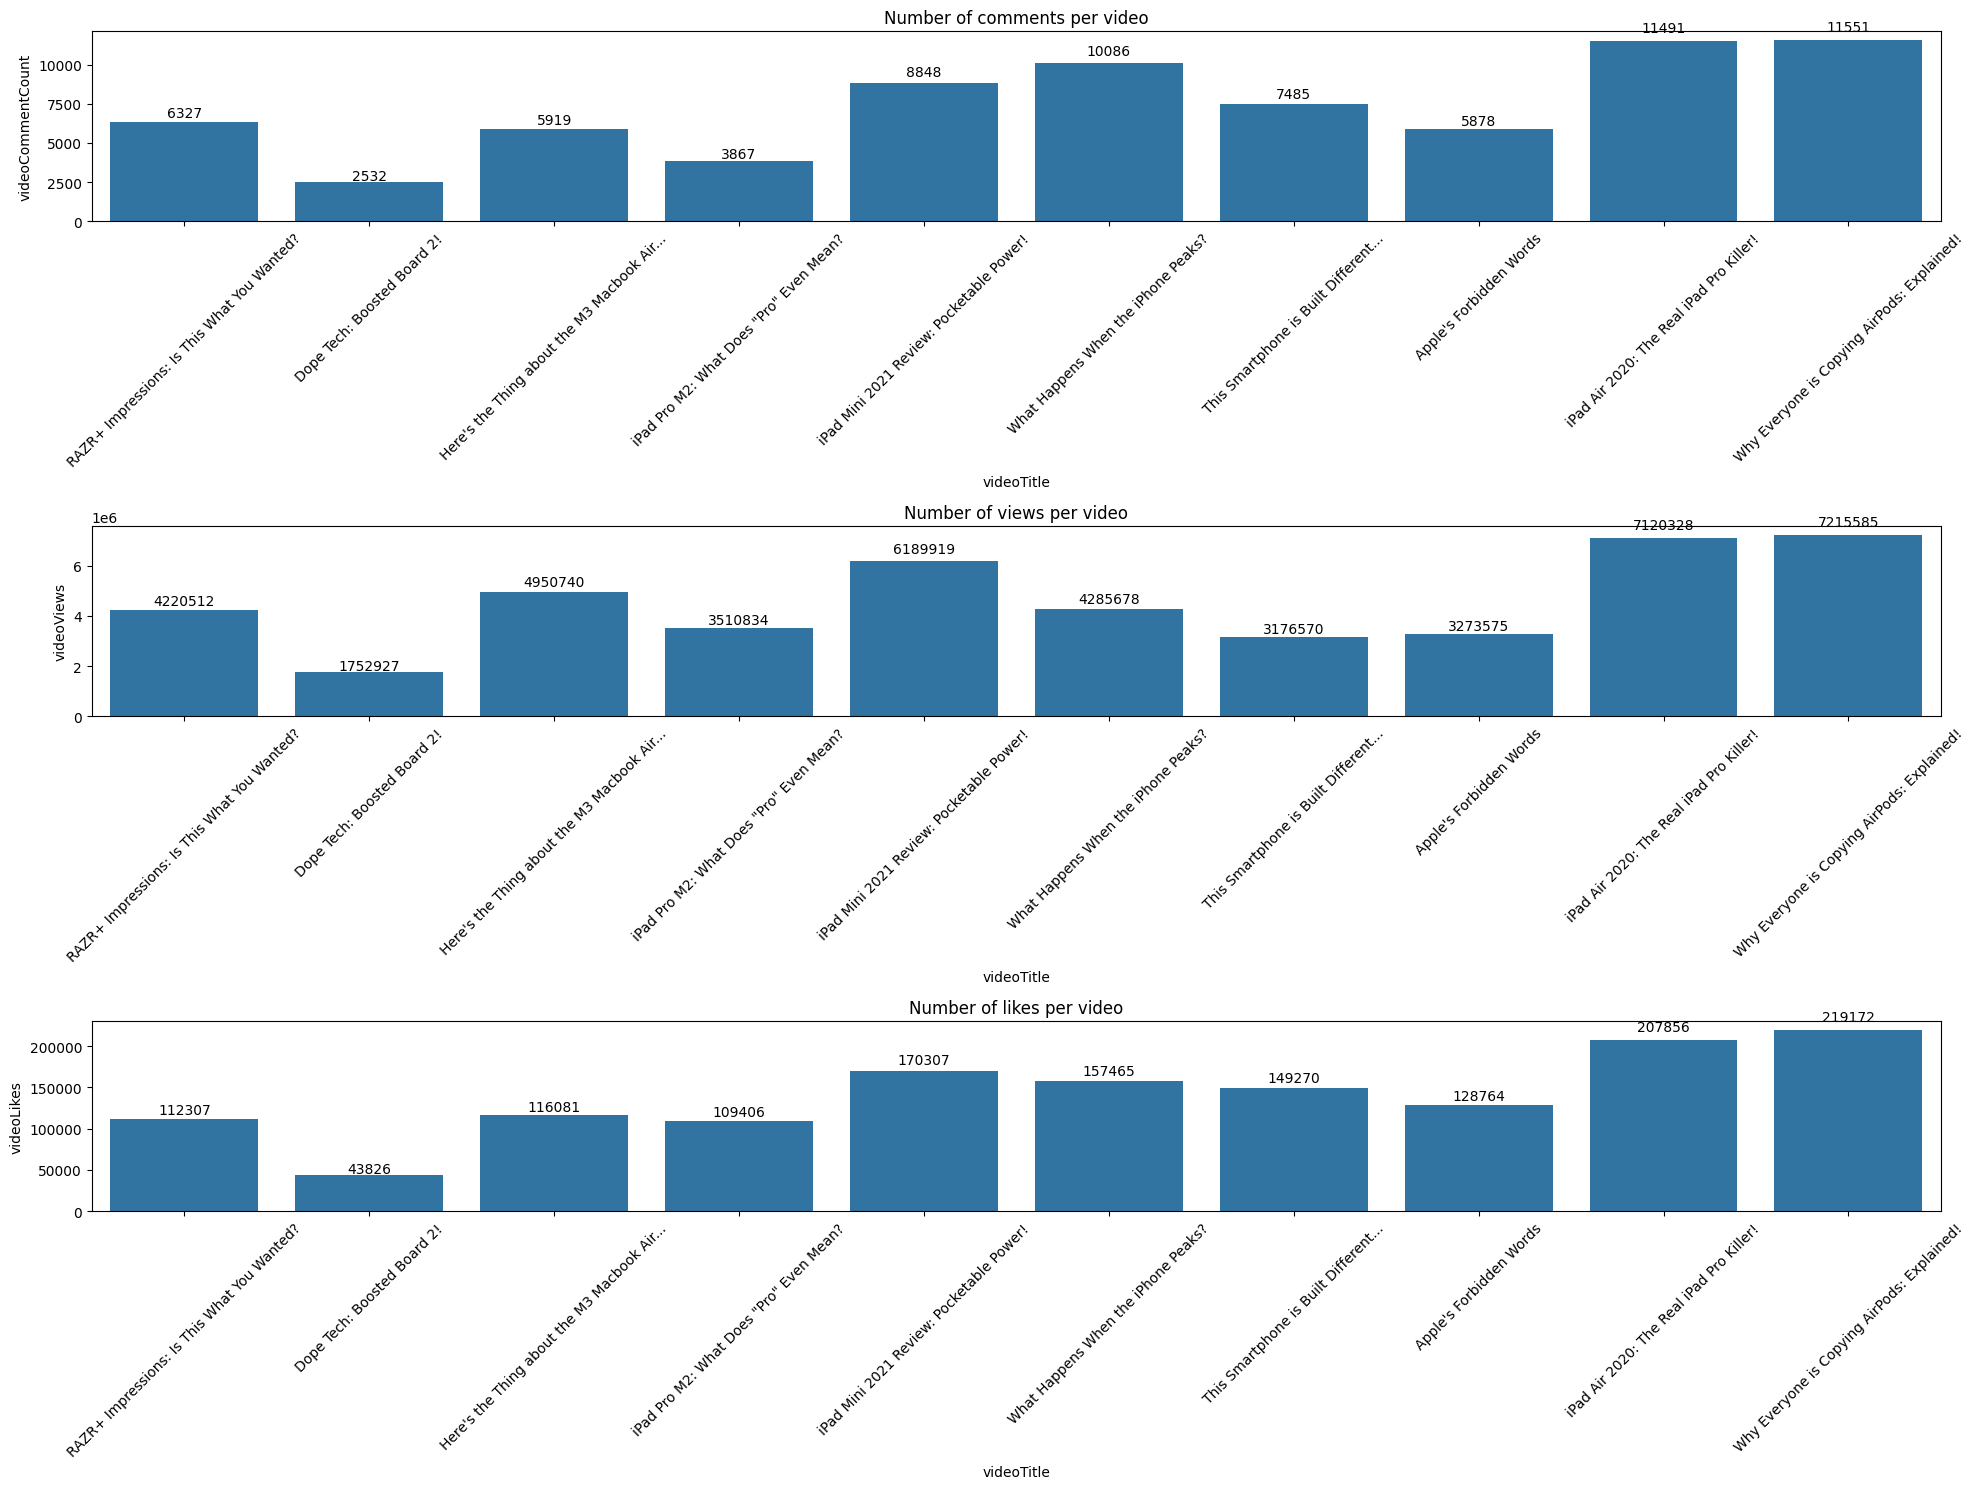

In [26]:
# bar plot for number of comments, number of view, number of likes per video in single plot 
fig, ax = plt.subplots(3, 1, figsize=(20, 15))

sns.barplot(x='videoTitle', y='videoCommentCount', data=df_comments_grouped, ax=ax[0])
ax[0].set_title('Number of comments per video')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
for p in ax[0].patches:
    ax[0].annotate(int(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height() * 1.05),ha='center')



sns.barplot(x='videoTitle', y='videoViews', data=df_comments_grouped, ax=ax[1])
ax[1].set_title('Number of views per video')
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
for q in ax[1].patches:
    ax[1].annotate(int(q.get_height()), (q.get_x() + q.get_width()/2, q.get_height() * 1.05),ha='center')


sns.barplot(x='videoTitle', y='videoLikes', data=df_comments_grouped, ax=ax[2])
ax[2].set_title('Number of likes per video')
ax[2].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
for r in ax[2].patches:
    ax[2].annotate(int(r.get_height()), (r.get_x()+ r.get_width()/2, r.get_height() * 1.05),ha='center')

plt.tight_layout()
plt.show()



# ***Sentiment Analysis***

In [34]:
import re 
import emoji
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [35]:
df_comments['commentLength'] = df_comments['commentText'].apply(lambda x: len(x.split()))
df_comments

,videoId,videoTitle,videoPublishedAt,videoLikes,videoViews,videoCommentCount,commentId,authorId,likeCount,dislikeCount,commentText,commentPublishedAt,commentLength,polarity
0,8om1eJrO2lU,RAZR+ Impressions: Is This What You Wanted?,2023-06-01 18:00:42+00:00,112307,4220512,6327,UgxR_ElTvBL4twU_REt4AaABAg,UC4wkdWmrO9fZwQvxSsa1Sag,0,0,This is the first phone that id actually be in...,2024-10-25 01:28:43+00:00,14,0.4019
1,8om1eJrO2lU,RAZR+ Impressions: Is This What You Wanted?,2023-06-01 18:00:42+00:00,112307,4220512,6327,UgyRrc3oLgZIN1I40yZ4AaABAg,UCPmFc1pUNTfhkigoMWNYj-A,0,0,I have bought a last year model Razr 2023 whi...,2024-10-22 18:55:11+00:00,38,0.1779
2,8om1eJrO2lU,RAZR+ Impressions: Is This What You Wanted?,2023-06-01 18:00:42+00:00,112307,4220512,6327,UgzWF5ptWIbq7tL3YV14AaABAg,UC-A_9OQ7tbv906tPp5l7pHA,0,0,"I personally like this front-screen idea, I am...",2024-10-22 16:54:17+00:00,49,0.8999
3,8om1eJrO2lU,RAZR+ Impressions: Is This What You Wanted?,2023-06-01 18:00:42+00:00,112307,4220512,6327,UgxxvX_jzB35oWYYNI14AaABAg,UCoUSgNf5e4D4gDm9KCNd5YQ,0,0,Does anyone know how to move samsung notes (in...,2024-10-19 22:05:43+00:00,13,0.0000
4,8om1eJrO2lU,RAZR+ Impressions: Is This What You Wanted?,2023-06-01 18:00:42+00:00,112307,4220512,6327,UgyQcqzRiCs5X7_8Ai54AaABAg,UC776mnqQrRhjKX4LcL5ymXQ,0,0,Yeah 999 no 😢,2024-10-16 17:13:20+00:00,4,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9708,HN-WH7C4K0Q,Here's the Thing about the M3 Macbook Air...,2024-03-20 21:20:58+00:00,116081,4950740,5919,UgxWE1vQbCnhp4r-rLl4AaABAg,UCLAzcfxDF3gVP8g90I70QIA,0,0,Hot take; you can just buy a zephyrus g14 for ...,2024-03-26 00:18:00+00:00,50,0.8894
9709,HN-WH7C4K0Q,Here's the Thing about the M3 Macbook Air...,2024-03-20 21:20:58+00:00,116081,4950740,5919,UgzUk8_VKJdh9A2_XNN4AaABAg,UCUikEf2uhEBAuGRSf2Bv60g,0,0,FYI Bought my M1 MacBook Air when they first ...,2024-03-26 00:16:27+00:00,38,0.6140
9710,HN-WH7C4K0Q,Here's the Thing about the M3 Macbook Air...,2024-03-20 21:20:58+00:00,116081,4950740,5919,UgzvoxXcoV0KXWpxOZN4AaABAg,UCJeyn2k-uwhHTMUySP1LaBQ,0,0,where is the option to watch the video in anot...,2024-03-26 00:14:01+00:00,13,0.0000
9711,HN-WH7C4K0Q,Here's the Thing about the M3 Macbook Air...,2024-03-20 21:20:58+00:00,116081,4950740,5919,Ugz9aGoHnUcNzX-xSz94AaABAg,UCdYR8FJsKFwZw8-WSqAQl3g,0,0,OSHOMAJOSEPH WAS HERE,2024-03-26 00:09:30+00:00,3,0.0000


In [36]:
hyperlink_pattern = re.compile(
    r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
)

threshold_ratio = 0.85

def is_relevant(comment_text):
    comment_text = str(comment_text).lower().strip()
    
    emojis = emoji.emoji_count(comment_text)
    text_characters = len(re.sub(r'\s', '', comment_text))  # Count text characters (excluding spaces)
    
    if (any(char.isalnum() for char in comment_text)) and not hyperlink_pattern.search(comment_text):
        if emojis == 0 or (text_characters / (text_characters + emojis)) > threshold_ratio:
            return True
    return False

df_comments['is_relevant'] = df_comments['commentText'].apply(is_relevant)

df_comments = df_comments[df_comments['is_relevant']].drop(columns=['is_relevant'])

df_comments.reset_index(drop=True, inplace=True)

print(df_comments)


          videoId                                    videoTitle  \
0     8om1eJrO2lU   RAZR+ Impressions: Is This What You Wanted?   
1     8om1eJrO2lU   RAZR+ Impressions: Is This What You Wanted?   
2     8om1eJrO2lU   RAZR+ Impressions: Is This What You Wanted?   
3     8om1eJrO2lU   RAZR+ Impressions: Is This What You Wanted?   
4     8om1eJrO2lU   RAZR+ Impressions: Is This What You Wanted?   
...           ...                                           ...   
9684  HN-WH7C4K0Q  Here's the Thing about the M3 Macbook Air...   
9685  HN-WH7C4K0Q  Here's the Thing about the M3 Macbook Air...   
9686  HN-WH7C4K0Q  Here's the Thing about the M3 Macbook Air...   
9687  HN-WH7C4K0Q  Here's the Thing about the M3 Macbook Air...   
9688  HN-WH7C4K0Q  Here's the Thing about the M3 Macbook Air...   

              videoPublishedAt  videoLikes  videoViews  videoCommentCount  \
0    2023-06-01 18:00:42+00:00      112307     4220512               6327   
1    2023-06-01 18:00:42+00:00      11230

In [37]:
nltk.download('vader_lexicon')

sentiment_object = SentimentIntensityAnalyzer()

polarity = []
positive_comments = []
negative_comments = []
neutral_comments = []

for comment in df_comments['commentText']:
    sentiment_dict = sentiment_object.polarity_scores(comment)
    compound_score = sentiment_dict['compound']
    polarity.append(compound_score)
    
    if compound_score > 0.05:
        positive_comments.append(comment)
    elif compound_score < -0.05:
        negative_comments.append(comment)
    else:
        neutral_comments.append(comment)

df_comments['polarity'] = polarity

[nltk_data] Downloading package vader_lexicon to C:\Users\ual-
[nltk_data]     laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [38]:
df_comments[['commentText', 'polarity']].head(20)

,commentText,polarity
0,This is the first phone that id actually be in...,0.4019
1,I have bought a last year model Razr 2023 whi...,0.1779
2,"I personally like this front-screen idea, I am...",0.8999
3,Does anyone know how to move samsung notes (in...,0.0000
4,Yeah 999 no 😢,0.0000
5,8s gen 1 ✅,0.0000
6,It&#39;s a pocket mirror 😂,0.0000
7,I used to think that flipping/folding phones a...,0.9536
8,this is good to use when going outside bevause...,0.4404
9,"hello world,\r<br>could someone help me please...",0.8622


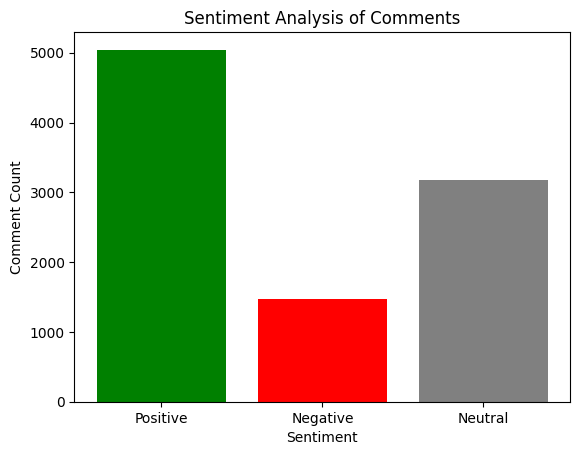

In [39]:
positive_count = len(df_comments[df_comments['polarity'] > 0.05])
negative_count = len(df_comments[df_comments['polarity'] < -0.05])
neutral_count = len(df_comments[(df_comments['polarity'] >= -0.05) & (df_comments['polarity'] <= 0.05)])

labels = ['Positive', 'Negative', 'Neutral']
comment_counts = [positive_count, negative_count, neutral_count]

plt.bar(labels, comment_counts, color=['Green', 'red', 'grey'])

plt.xlabel('Sentiment')
plt.ylabel('Comment Count')
plt.title('Sentiment Analysis of Comments')

plt.show()

